<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
#!pip install -U scikit-learn
%pip install tqdm
%pip install pandas
%pip install seaborn
%pip install numpy
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns



## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
data = pd.read_csv('gender_classification_v7.csv')
data.head(10)

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'gender_classification_v7.csv'

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 293.1+ KB


In [5]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.shape

(5001, 8)

In [7]:
data.isnull().sum()
data.isnull().values.any()

False

# 2. Objectives


In [8]:
data.nunique()

long_hair                     2
forehead_width_cm            42
forehead_height_cm           21
nose_wide                     2
nose_long                     2
lips_thin                     2
distance_nose_to_lip_long     2
gender                        2
dtype: int64

In [9]:
data=data.drop('distance_nose_to_lip_long',axis=1)
data=data.drop('forehead_width_cm',axis=1)
data.head()


,long_hair,forehead_height_cm,nose_wide,nose_long,lips_thin,gender
0,1,6.1,1,0,1,Male
1,0,5.4,0,0,1,Female
2,0,6.3,1,1,1,Male
3,0,6.1,0,1,1,Male
4,1,5.9,0,0,0,Female


In [10]:
data['long_hair'].value_counts()

1    4349
0     652
Name: long_hair, dtype: int64

In [11]:
data['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [12]:
data['nose_wide'].value_counts()

0    2531
1    2470
Name: nose_wide, dtype: int64

In [13]:
data['nose_long'].value_counts()

1    2540
0    2461
Name: nose_long, dtype: int64

# 3. Linear Regression Models


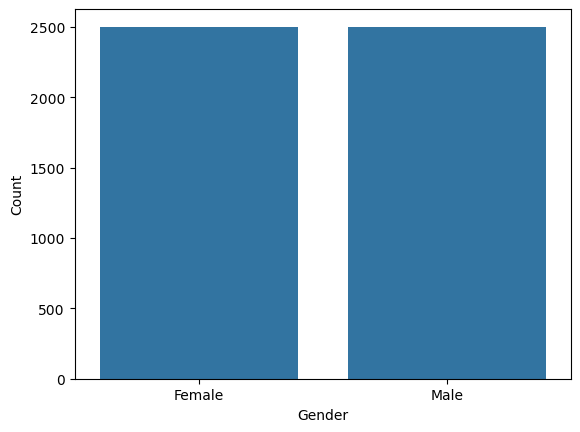

In [14]:
gender_counts = data['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

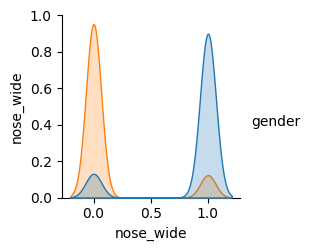

In [15]:
sns.pairplot(data, vars=['nose_wide'], hue='gender')
plt.show()

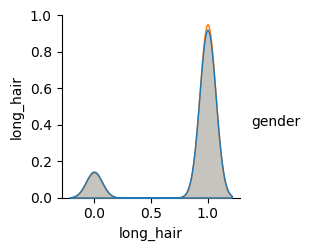

In [16]:
sns.pairplot(data, vars=['long_hair'], hue='gender')
plt.show()

<AxesSubplot:xlabel='nose_wide', ylabel='forehead_height_cm'>

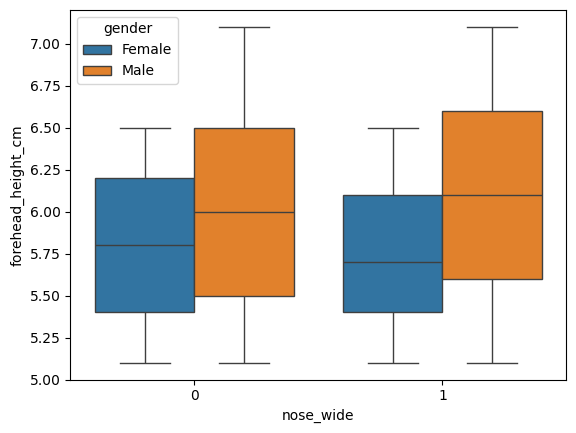

In [17]:

sns.boxplot(x='nose_wide',y='forehead_height_cm',hue='gender',data=data)

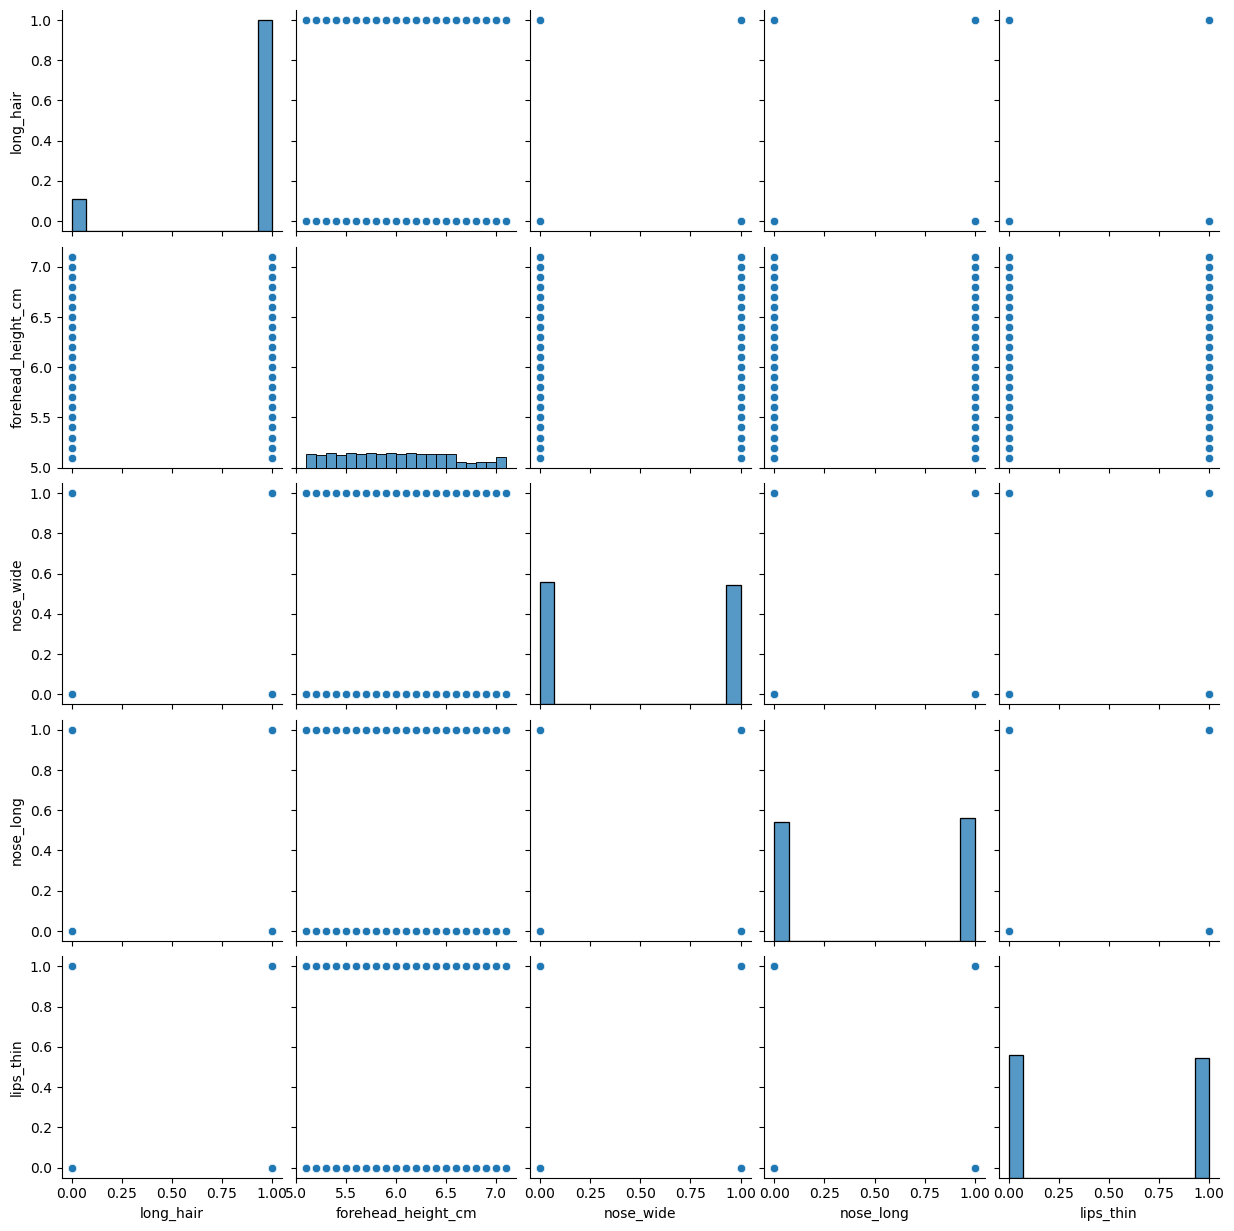

In [18]:
sns.pairplot(data)

<ipython-input-19-c3f8938038a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='plasma', annot=True)


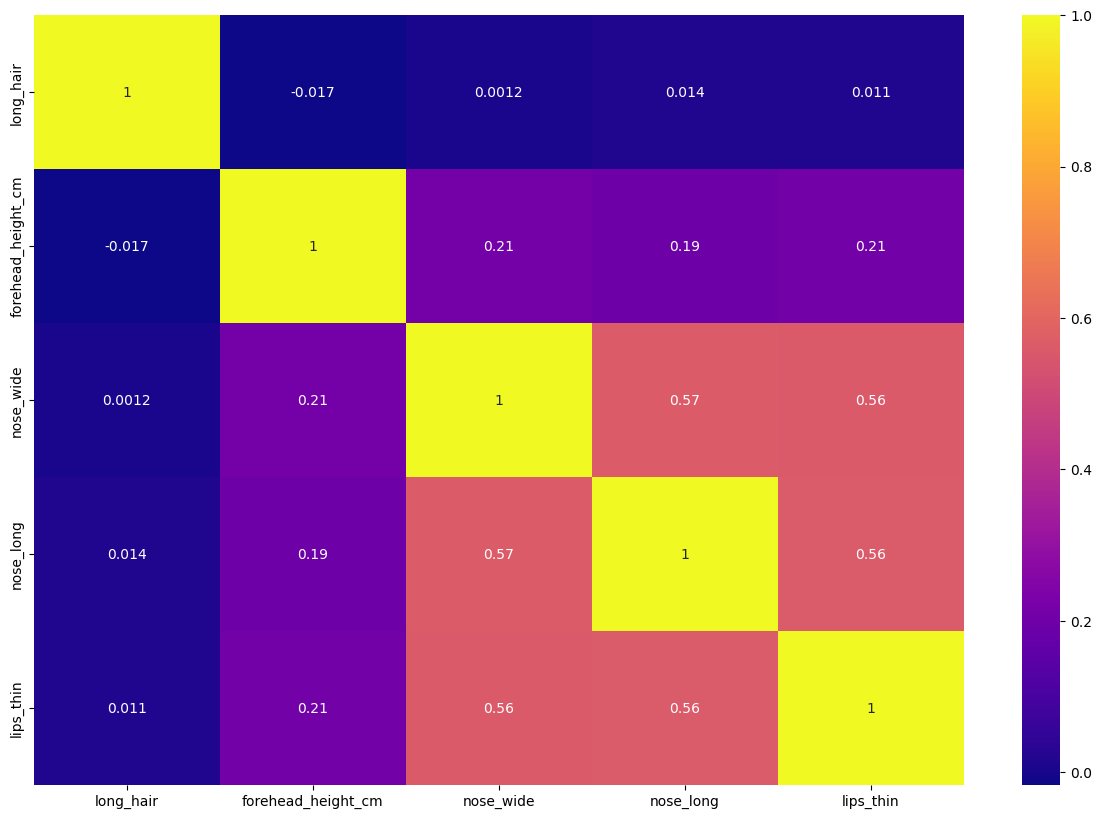

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='plasma', annot=True)
plt.show()

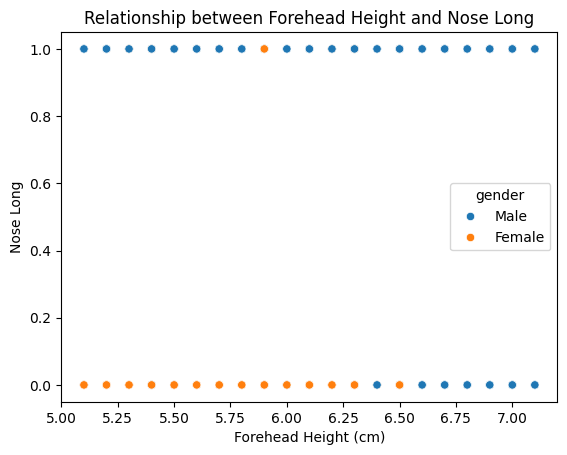

In [24]:
sns.scatterplot(x='forehead_height_cm', y='nose_wide', data=data, hue='gender')
plt.xlabel('Forehead Height (cm)')
plt.ylabel('Nose Long')
plt.title('Relationship between Forehead Height and Nose Long')
plt.show()

In [43]:
data_X = data.drop(columns=['gender']) 
data_Y = data['gender'] 
train_X,test_X,train_Y,test_Y=train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=0)


<class 'NameError'>: name 'MinMaxScaler' is not defined

In [26]:
data_X.shape,data_Y.shape

((5001, 5), (5001,))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_X = scaler.fit_transform(data_X)

In [28]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression(C=1.0, max_iter=2000)
LogisticRegression.fit(train_X, train_Y)

LogisticRegression(max_iter=2000)

In [29]:
Name = ['Male', 'Female']

Train Accuracy: 0.9585714285714285
Test Accuracy: 0.9513657561625583
Train Precision: 0.9585727762138729
Test Precision: 0.951430288040092
Train Recall: 0.9585714285714285
Test Recall: 0.9513657561625583


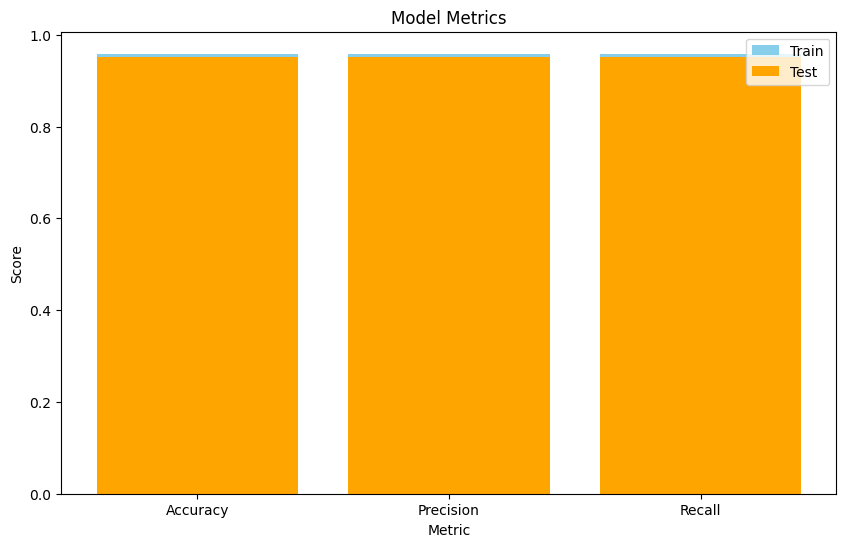

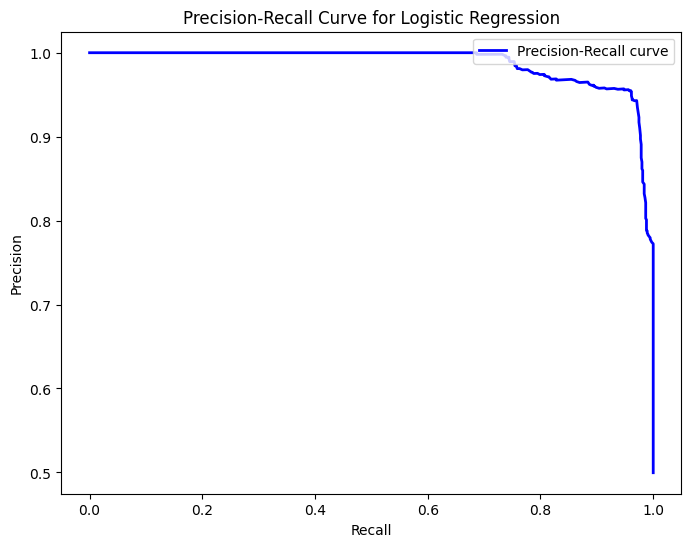

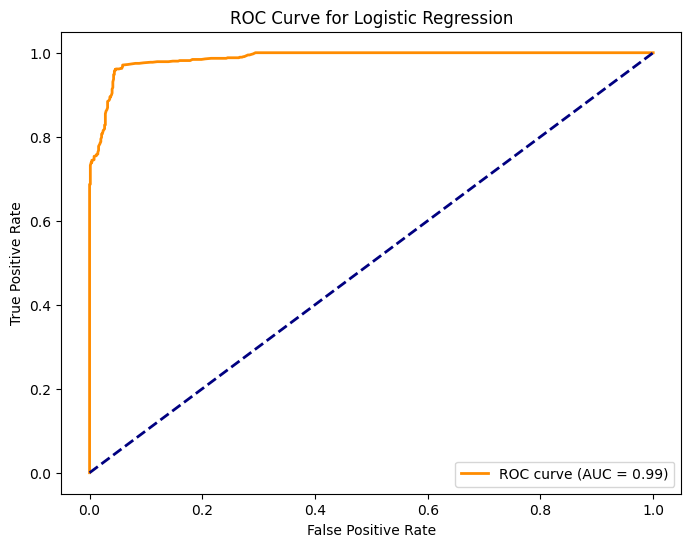

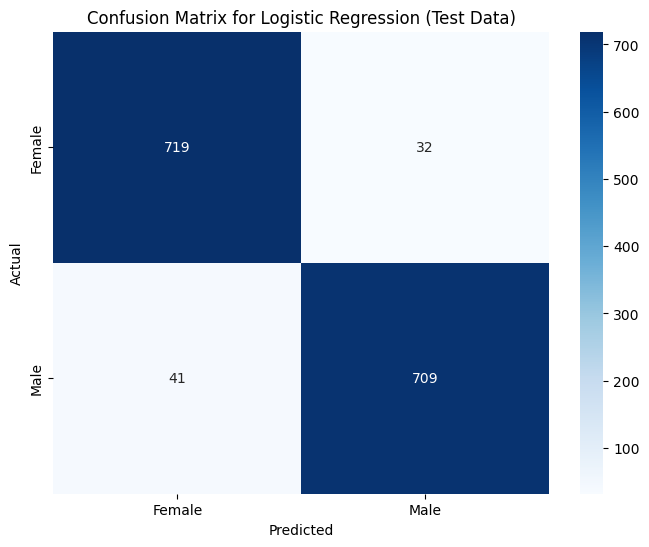

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to binary format
label_encoder = LabelEncoder()
test_Y_encoded = label_encoder.fit_transform(test_Y)

# Create an instance of the LogisticRegression model
logistic_regression = LogisticRegression()

# Fit the model to the training data
logistic_regression.fit(train_X, train_Y)

# Calculate accuracy
train_accuracy = accuracy_score(train_Y, logistic_regression.predict(train_X))
test_accuracy = accuracy_score(test_Y, logistic_regression.predict(test_X))

# Calculate precision
train_precision = precision_score(train_Y, logistic_regression.predict(train_X), average='weighted')
test_precision = precision_score(test_Y, logistic_regression.predict(test_X), average='weighted')

# Calculate recall
train_recall = recall_score(train_Y, logistic_regression.predict(train_X), average='weighted')
test_recall = recall_score(test_Y, logistic_regression.predict(test_X), average='weighted')

# Print the scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall']
train_scores = [train_accuracy, train_precision, train_recall]
test_scores = [test_accuracy, test_precision, test_recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics, train_scores, color='skyblue', label='Train')
plt.bar(metrics, test_scores, color='orange', label='Test')
plt.title('Model Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend()
plt.show()

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(test_Y_encoded, logistic_regression.predict_proba(test_X)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='upper right')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_Y_encoded, logistic_regression.predict_proba(test_X)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(test_Y_encoded, logistic_regression.predict_proba(test_X)[:, 1])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix for test data
conf_mat = confusion_matrix(test_Y, logistic_regression.predict(test_X))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Logistic Regression (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Train Accuracy: 0.9668571428571429
Test Accuracy: 0.9613590939373751
Train Precision: 0.9669943820224719
Test Precision: 0.9614413602807306
Train Recall: 0.9668571428571429
Test Recall: 0.9613590939373751


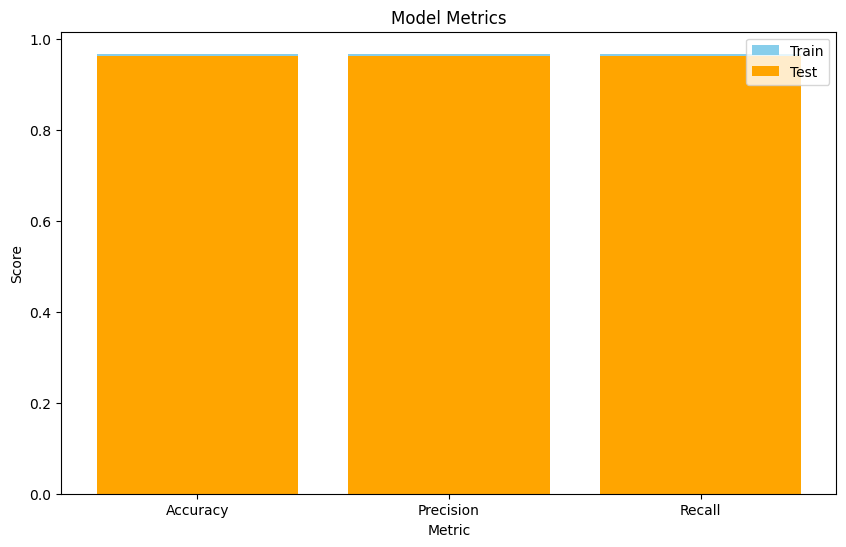

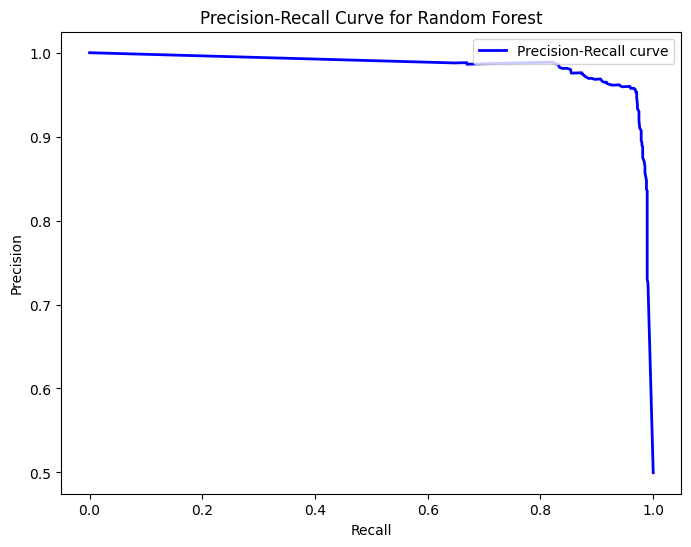

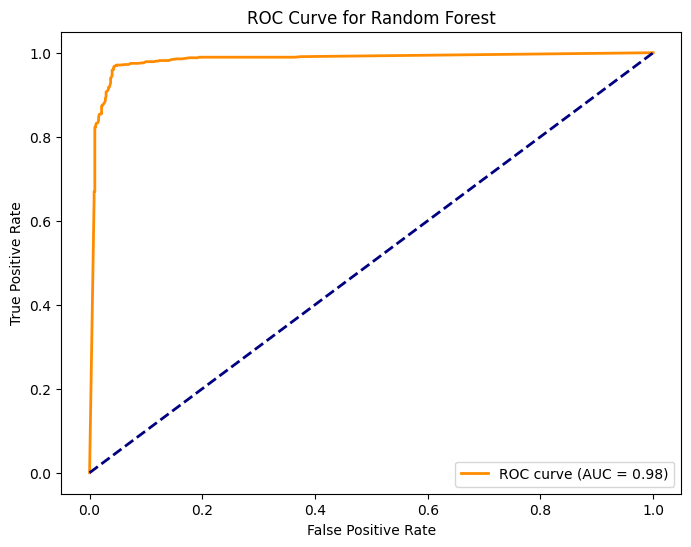

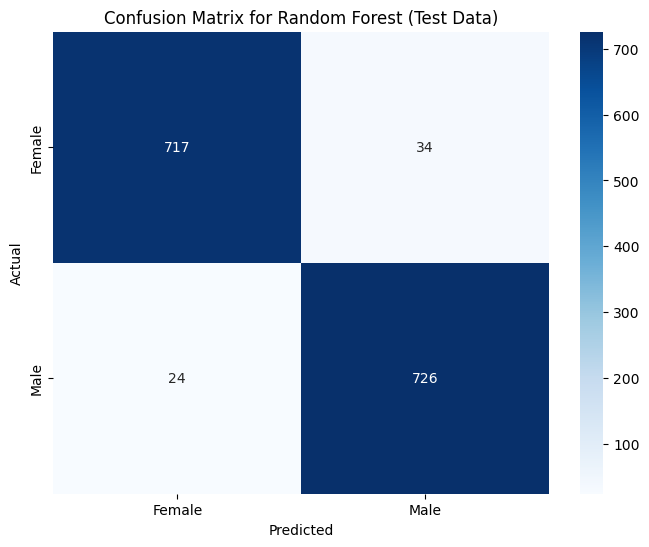

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to binary format
label_encoder = LabelEncoder()
test_Y_encoded = label_encoder.fit_transform(test_Y)

# Create an instance of the RandomForestClassifier model
random_forest = RandomForestClassifier()

# Fit the model to the training data
random_forest.fit(train_X, train_Y)

# Calculate accuracy
train_accuracy = accuracy_score(train_Y, random_forest.predict(train_X))
test_accuracy = accuracy_score(test_Y, random_forest.predict(test_X))

# Calculate precision
train_precision = precision_score(train_Y, random_forest.predict(train_X), average='weighted')
test_precision = precision_score(test_Y, random_forest.predict(test_X), average='weighted')

# Calculate recall
train_recall = recall_score(train_Y, random_forest.predict(train_X), average='weighted')
test_recall = recall_score(test_Y, random_forest.predict(test_X), average='weighted')

# Print the scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall']
train_scores = [train_accuracy, train_precision, train_recall]
test_scores = [test_accuracy, test_precision, test_recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics, train_scores, color='skyblue', label='Train')
plt.bar(metrics, test_scores, color='orange', label='Test')
plt.title('Model Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend()
plt.show()

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(test_Y_encoded, random_forest.predict_proba(test_X)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='upper right')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_Y_encoded, random_forest.predict_proba(test_X)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(test_Y_encoded, random_forest.predict_proba(test_X)[:, 1])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix for test data
conf_mat = confusion_matrix(test_Y, random_forest.predict(test_X))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Random Forest (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Train Accuracy: 0.9668571428571429
Test Accuracy: 0.9566955363091273
Train Precision: 0.9668870236266549
Test Precision: 0.9566963086923481
Train Recall: 0.9668571428571429
Test Recall: 0.9566955363091273


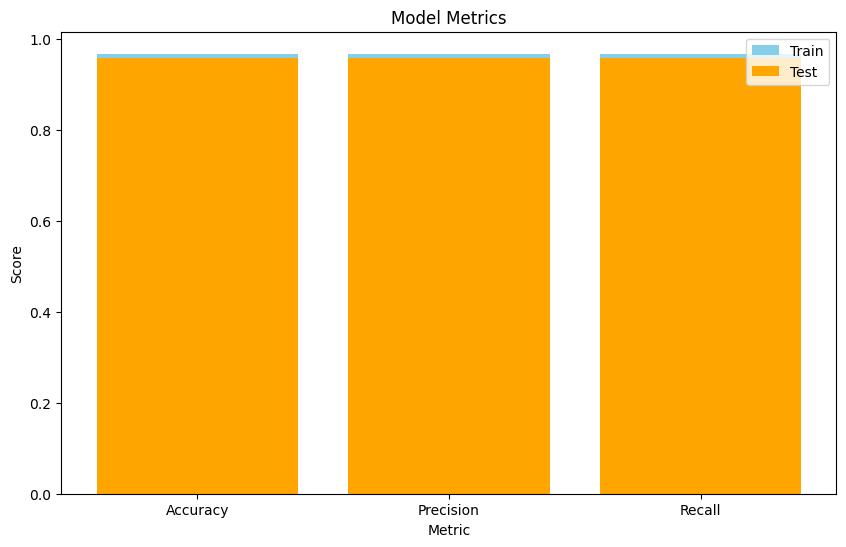

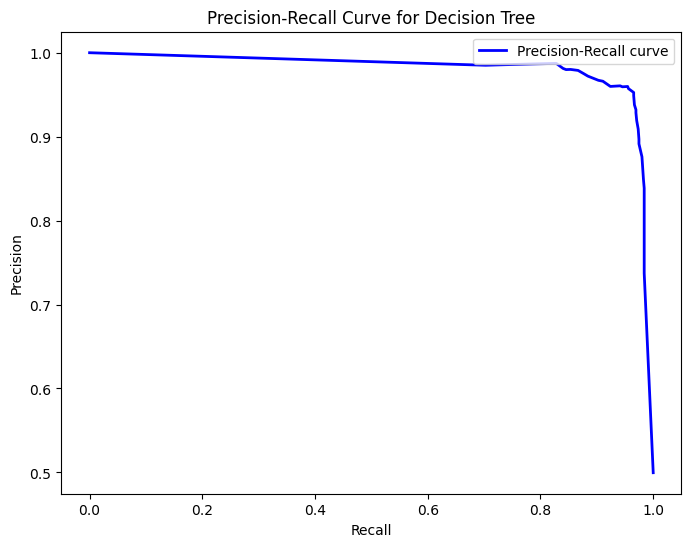

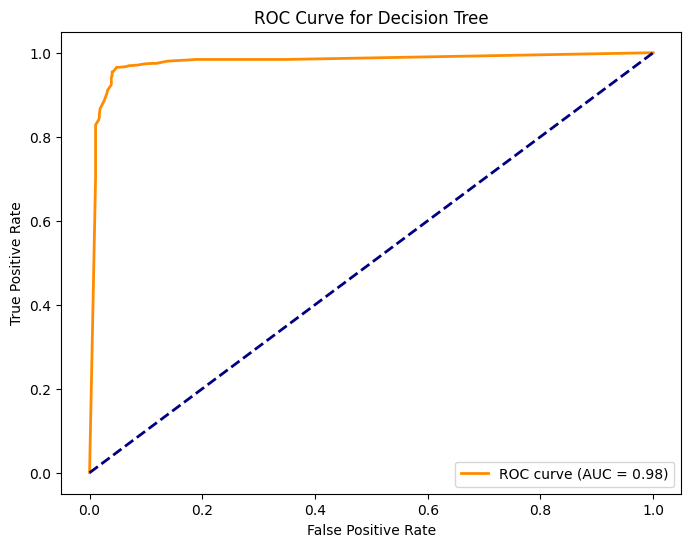

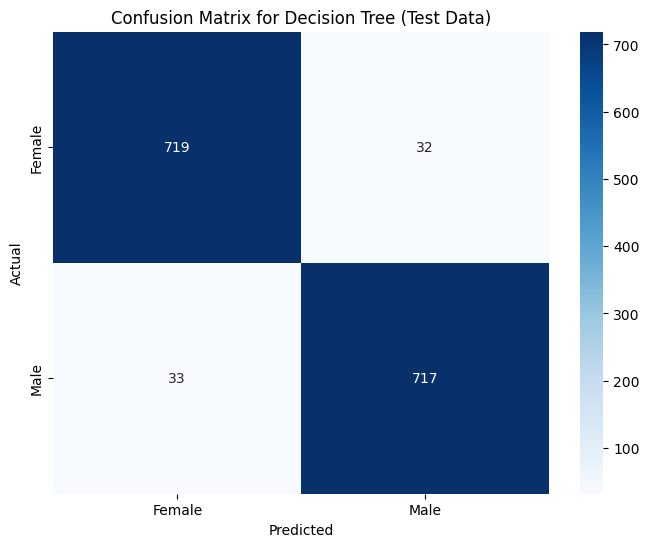

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to binary format
label_encoder = LabelEncoder()
test_Y_encoded = label_encoder.fit_transform(test_Y)

# Create an instance of the DecisionTreeClassifier model
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree.fit(train_X, train_Y)

# Calculate accuracy
train_accuracy = accuracy_score(train_Y, decision_tree.predict(train_X))
test_accuracy = accuracy_score(test_Y, decision_tree.predict(test_X))

# Calculate precision
train_precision = precision_score(train_Y, decision_tree.predict(train_X), average='weighted')
test_precision = precision_score(test_Y, decision_tree.predict(test_X), average='weighted')

# Calculate recall
train_recall = recall_score(train_Y, decision_tree.predict(train_X), average='weighted')
test_recall = recall_score(test_Y, decision_tree.predict(test_X), average='weighted')

# Print the scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall']
train_scores = [train_accuracy, train_precision, train_recall]
test_scores = [test_accuracy, test_precision, test_recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics, train_scores, color='skyblue', label='Train')
plt.bar(metrics, test_scores, color='orange', label='Test')
plt.title('Model Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend()
plt.show()

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(test_Y_encoded, decision_tree.predict_proba(test_X)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend(loc='upper right')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_Y_encoded, decision_tree.predict_proba(test_X)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(test_Y_encoded, decision_tree.predict_proba(test_X)[:, 1])))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix for test data
conf_mat = confusion_matrix(test_Y, decision_tree.predict(test_X))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Decision Tree (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Train Accuracy: 0.9628571428571429
Test Accuracy: 0.9566955363091273
Train Precision: 0.9628722570532916
Test Precision: 0.9566963855728079
Train Recall: 0.9628571428571429
Test Recall: 0.9566955363091273


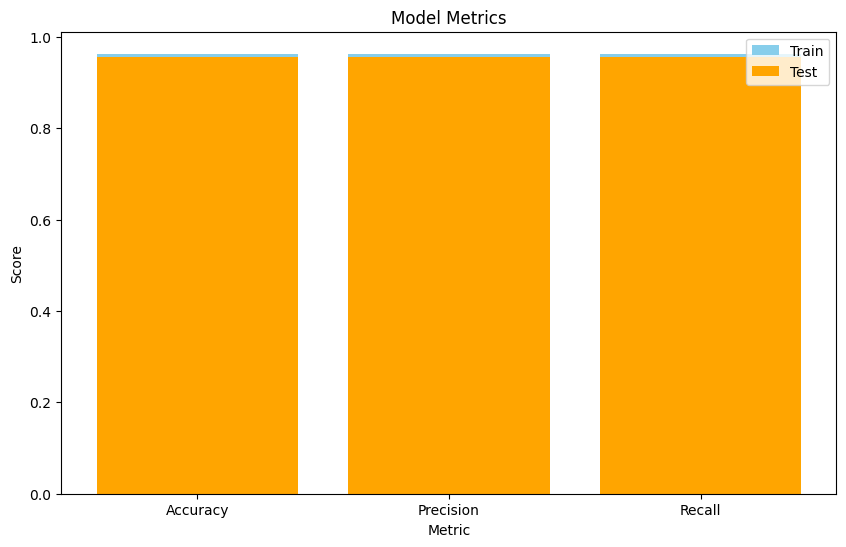

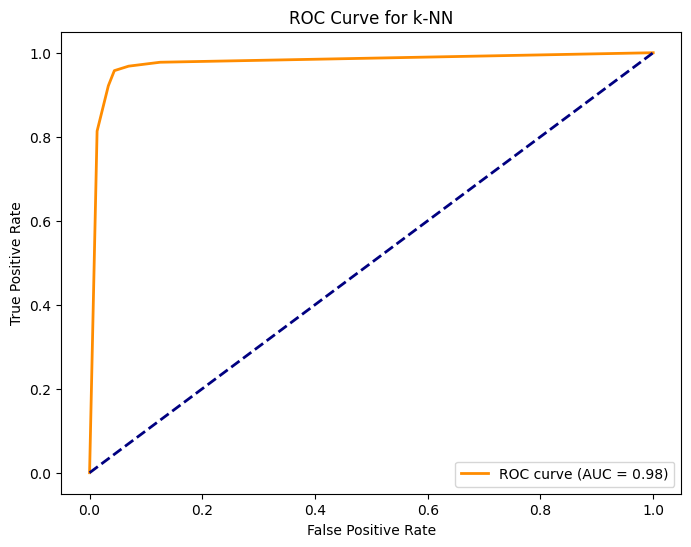

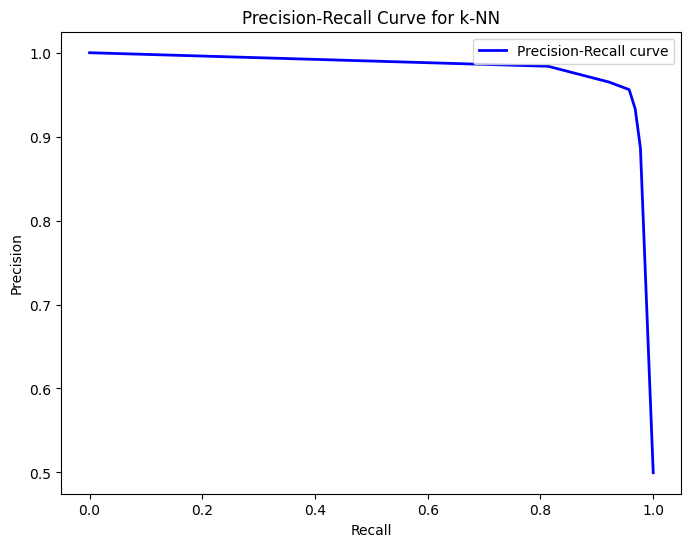

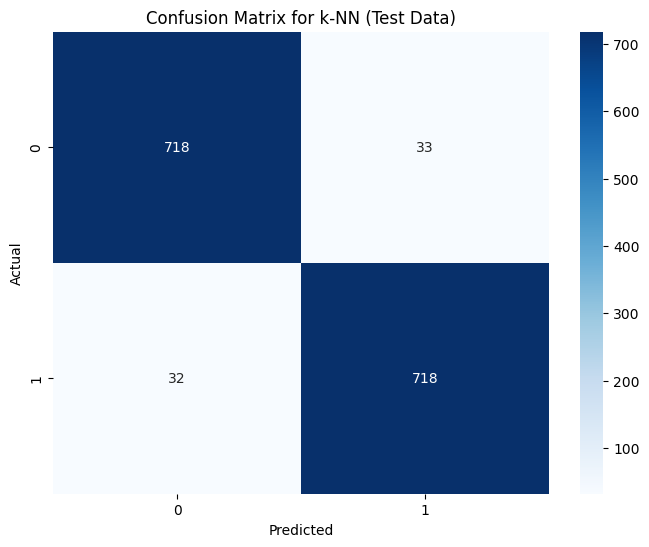

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical labels to binary format
train_Y_encoded = label_encoder.fit_transform(train_Y)
test_Y_encoded = label_encoder.transform(test_Y)

# Create an instance of the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Fit the model to the training data
knn_classifier.fit(train_X, train_Y_encoded)

# Calculate accuracy
train_accuracy = accuracy_score(train_Y_encoded, knn_classifier.predict(train_X))
test_accuracy = accuracy_score(test_Y_encoded, knn_classifier.predict(test_X))

# Calculate precision
train_precision = precision_score(train_Y_encoded, knn_classifier.predict(train_X), average='weighted')
test_precision = precision_score(test_Y_encoded, knn_classifier.predict(test_X), average='weighted')

# Calculate recall
train_recall = recall_score(train_Y_encoded, knn_classifier.predict(train_X), average='weighted')
test_recall = recall_score(test_Y_encoded, knn_classifier.predict(test_X), average='weighted')

# Print the scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall']
train_scores = [train_accuracy, train_precision, train_recall]
test_scores = [test_accuracy, test_precision, test_recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics, train_scores, color='skyblue', label='Train')
plt.bar(metrics, test_scores, color='orange', label='Test')
plt.title('Model Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend()
plt.show()
# Plot ROC curve for test data
fpr, tpr, thresholds = roc_curve(test_Y_encoded, knn_classifier.predict_proba(test_X)[:, 1])
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for k-NN')
plt.legend(loc='lower right')
plt.show()
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(test_Y_encoded, knn_classifier.predict_proba(test_X)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for k-NN')
plt.legend(loc='upper right')
plt.show()


# Plot confusion matrix for test data
conf_mat = confusion_matrix(test_Y_encoded, knn_classifier.predict(test_X))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='d')
plt.title('Confusion Matrix for k-NN (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# 4. Insights and key findings


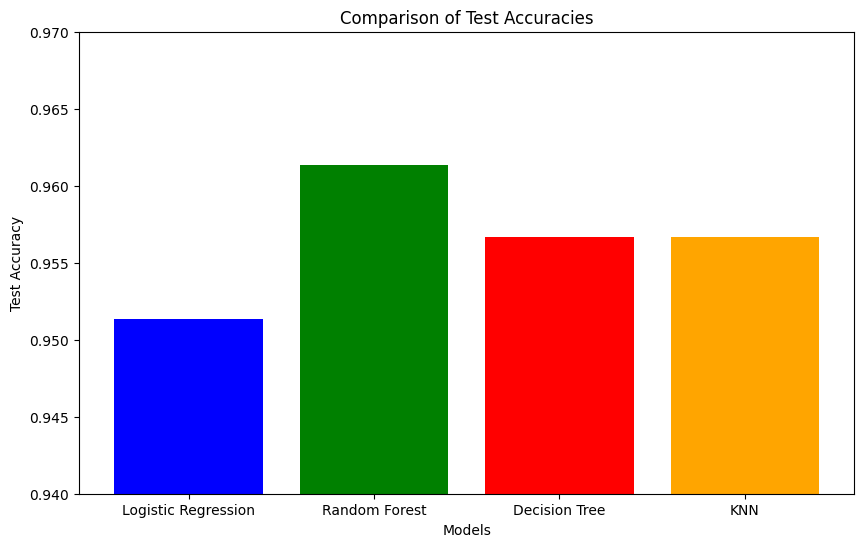

In [3]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
accuracies = [0.9513657561625583, 0.9613590939373751, 0.9566955363091273, 0.9566955363091273]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')
plt.ylim(0.94, 0.97)  # Adjust ylim for better visualization
plt.show()


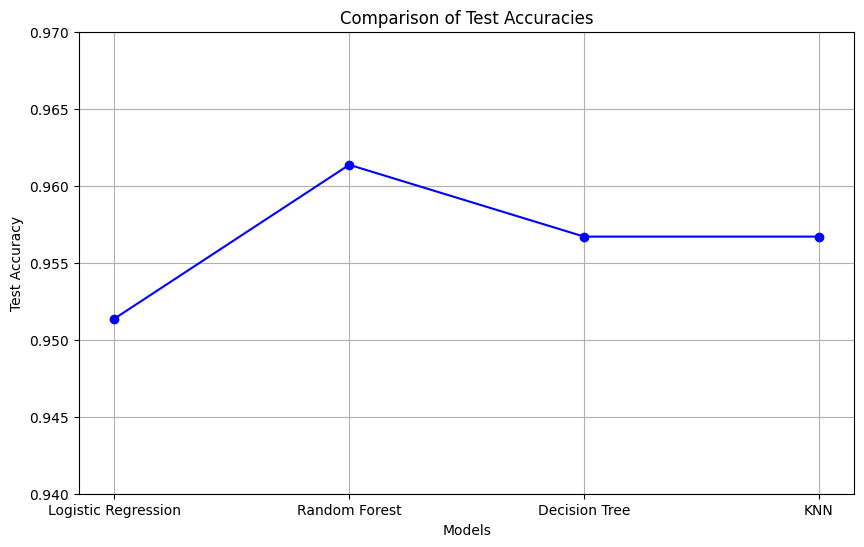

In [4]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
accuracies = [0.9513657561625583, 0.9613590939373751, 0.9566955363091273, 0.9566955363091273]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')
plt.ylim(0.94, 0.97)  # Adjust ylim for better visualization
plt.grid(True)
plt.show()


This graph compares the test accuracies of four different models: Logistic Regression, Random Forest, Decision Tree, and KNN. Each model's test accuracy is represented by a point on the line. We observe that Random Forest has the highest test accuracy, followed closely by Decision Tree and KNN. Logistic Regression performs slightly lower in terms of test accuracy compared to the other models. Overall, Random Forest seems to perform the best among the models evaluated.

# 5. Next Steps


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
